In [1]:
#!pip install mlxtend
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [25]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth',None)

In [26]:
book_df = pd.read_csv('C:/Users/soumy/Documents/association rules/book.csv')
book_df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


**EDA**

In [27]:
#checking missing values
book_df.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [28]:
#checking duplicate values
book_df[book_df.duplicated()].sum()

ChildBks     650
YouthBks     351
CookBks      644
DoItYBks     407
RefBks       267
ArtBks       304
GeogBks      385
ItalCook     120
ItalAtlas     23
ItalArt       36
Florence     115
dtype: int64

In [29]:
#checking data types
book_df.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [30]:
book_df.iloc[:,:].sum()

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

**Data Visualisation**

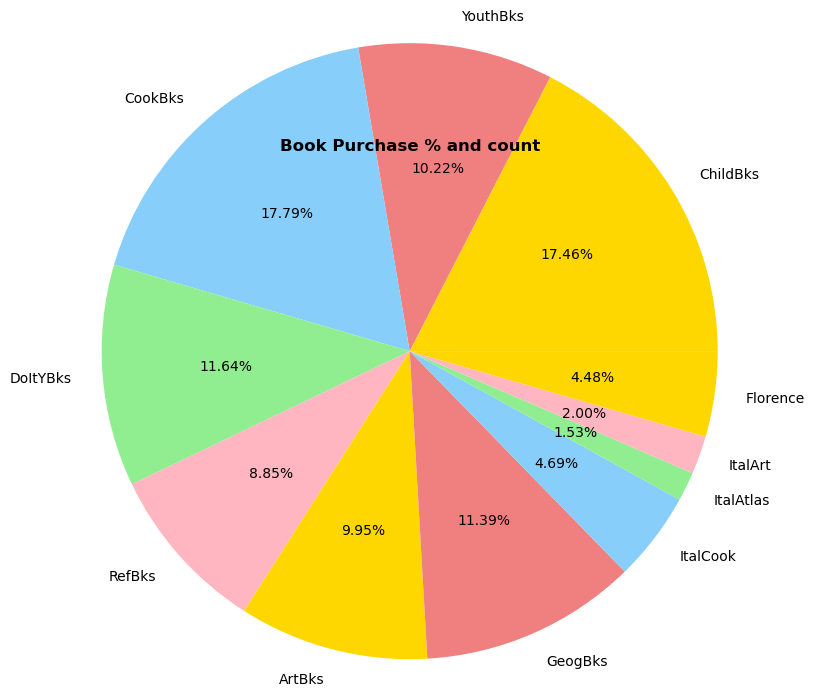

In [31]:
values_book = book_df.iloc[:,:].sum()
labels_book = book_df.columns
plt.figure(figsize = [5,5])
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightpink']
plt.pie(values_book, labels=labels_book, autopct= '%.2f%%', radius = 2,colors=colors)
plt.title('Book Purchase % and count', fontsize = 12, fontweight = 'bold')
plt.show()

In [32]:
# Assuming 'values_book' is a Series
values_book = values_book.sort_values(ascending=False).reset_index(drop=True)

# Convert the sorted Series to a DataFrame and rename columns
count = values_book.to_frame().reset_index().rename(columns={'index': 'Movies', 0: 'Purchase Frequency'})

count

,Movies,Purchase Frequency
0,0,862
1,1,846
2,2,564
3,3,552
4,4,495
5,5,482
6,6,429
7,7,227
8,8,217
9,9,97


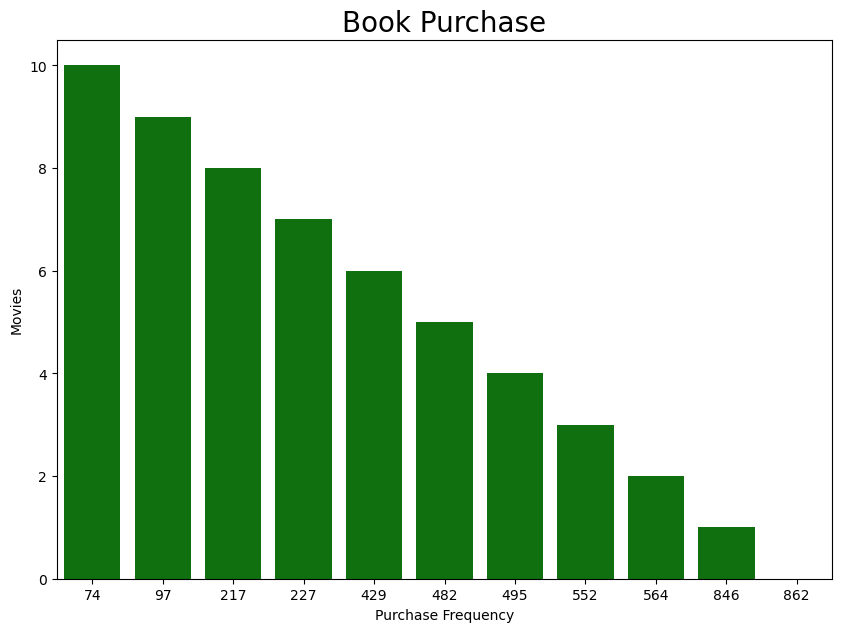

In [33]:
plt.figure(figsize=[10,7])
sns.barplot(x = 'Purchase Frequency', y = 'Movies', data = count,color='green')
plt.title('Book Purchase', fontsize=20)
plt.show()

### Apriori Algorithm

**Min Support = 10% Confidence = 70%**

In [36]:
#with support atleast 0.1 and confidence = 70%
frequent_itemsets = apriori(book_df, min_support = 0.1, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [37]:
rule = association_rules(frequent_itemsets, metric = "lift", min_threshold = .70)
rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355


In [38]:
rule.sort_values('lift', ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
76,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
81,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
85,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
84,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,0.682834
99,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114
94,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298


**Visualisation of Rule with min Support = 10% and Confidence = 70%**

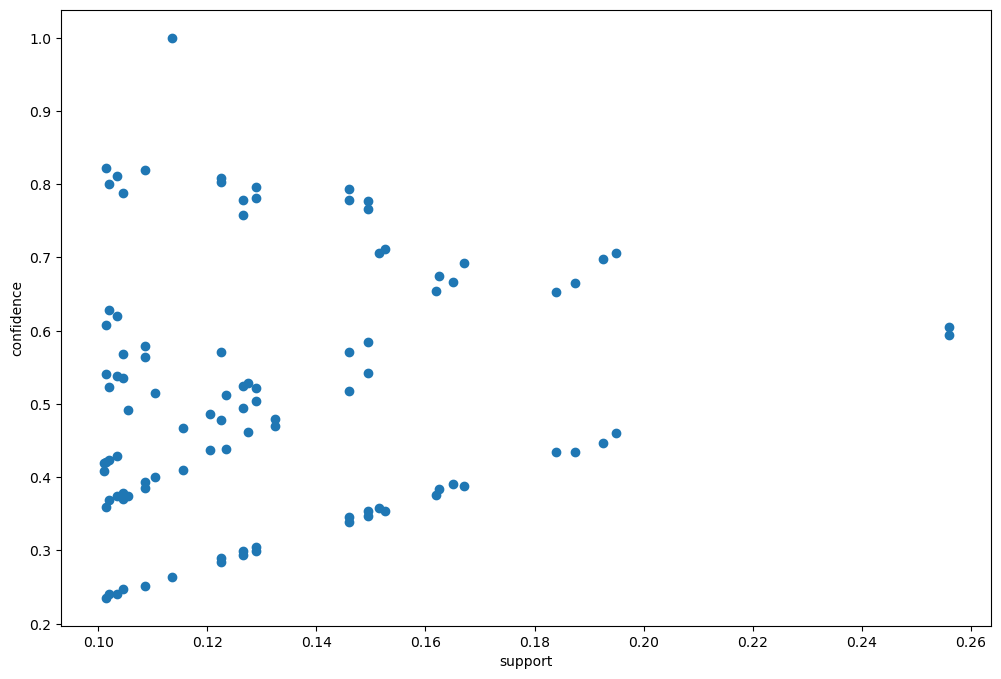

In [39]:
# visualization of obtained rule
plt.figure(figsize=(12,8))
plt.scatter(rule['support'],rule['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

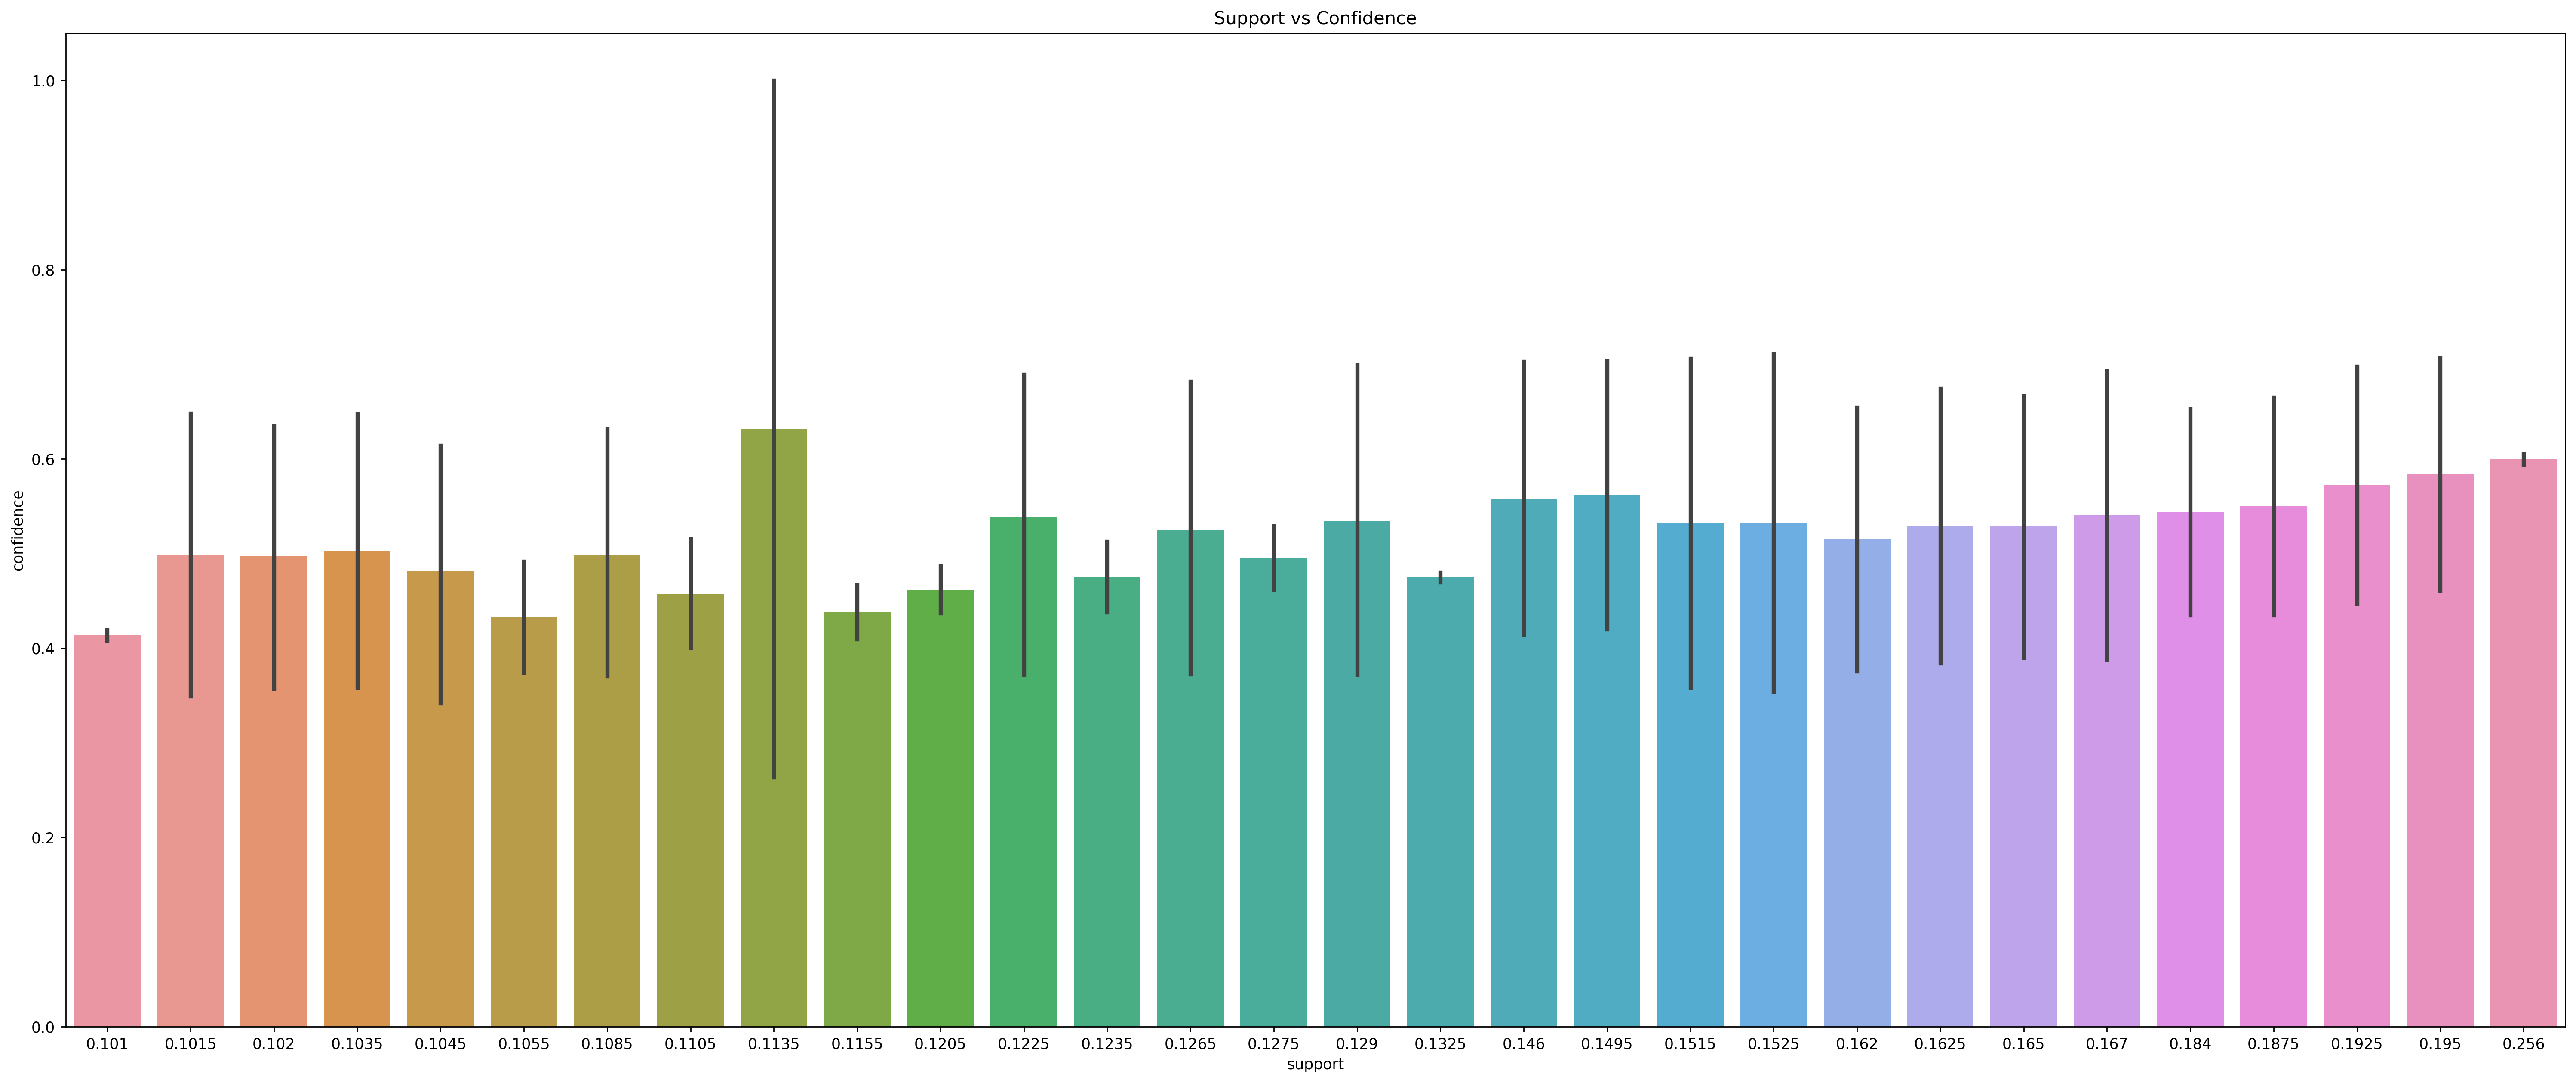

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 12), dpi=250)
sns.barplot(x="support", y="confidence", data=rule)
plt.title("Support vs Confidence")
plt.show()


**Min support = 15% Confidence = 70%**

In [46]:
#with support atleast 0.15 and confidence >= 70%
frequent_itemsets1 = apriori(book_df, min_support = 0.15, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(ChildBks, YouthBks)"
8,0.2560,"(ChildBks, CookBks)"
9,0.1840,"(ChildBks, DoItYBks)"


In [47]:
rule1 = association_rules(frequent_itemsets1, metric = "lift", min_threshold = .70)
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818,0.695146
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
8,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464,0.645855
9,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427,0.490986


We can observe by increasing the min support level we have reduced the number of rules as well.

**Visualisation of rule with min Support = 15% Confidence = 70%**

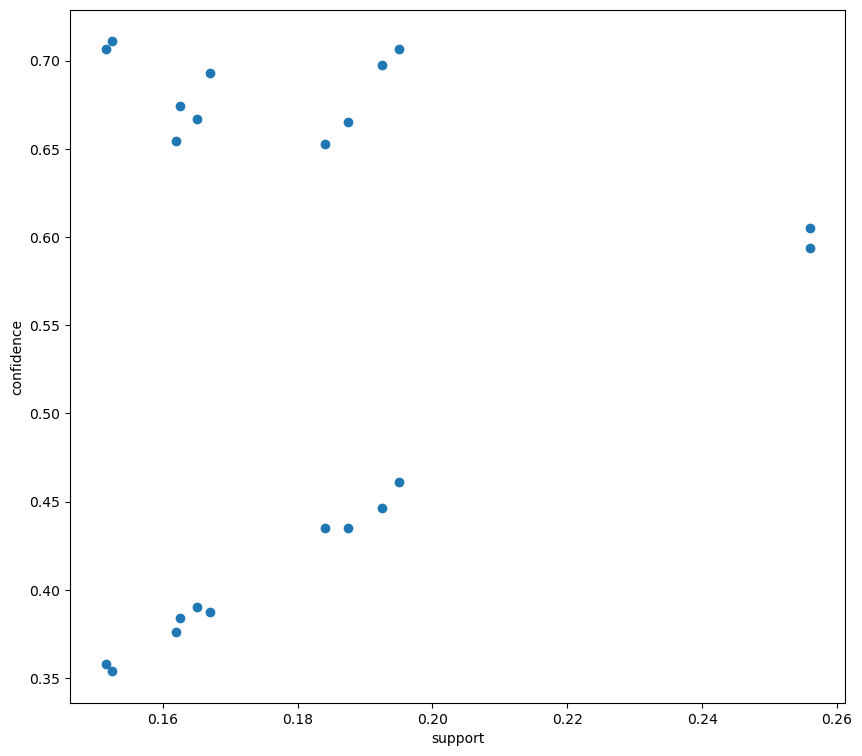

In [48]:
# visualization of obtained rule
plt.figure(figsize=(10,9))
plt.scatter(rule1['support'],rule1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

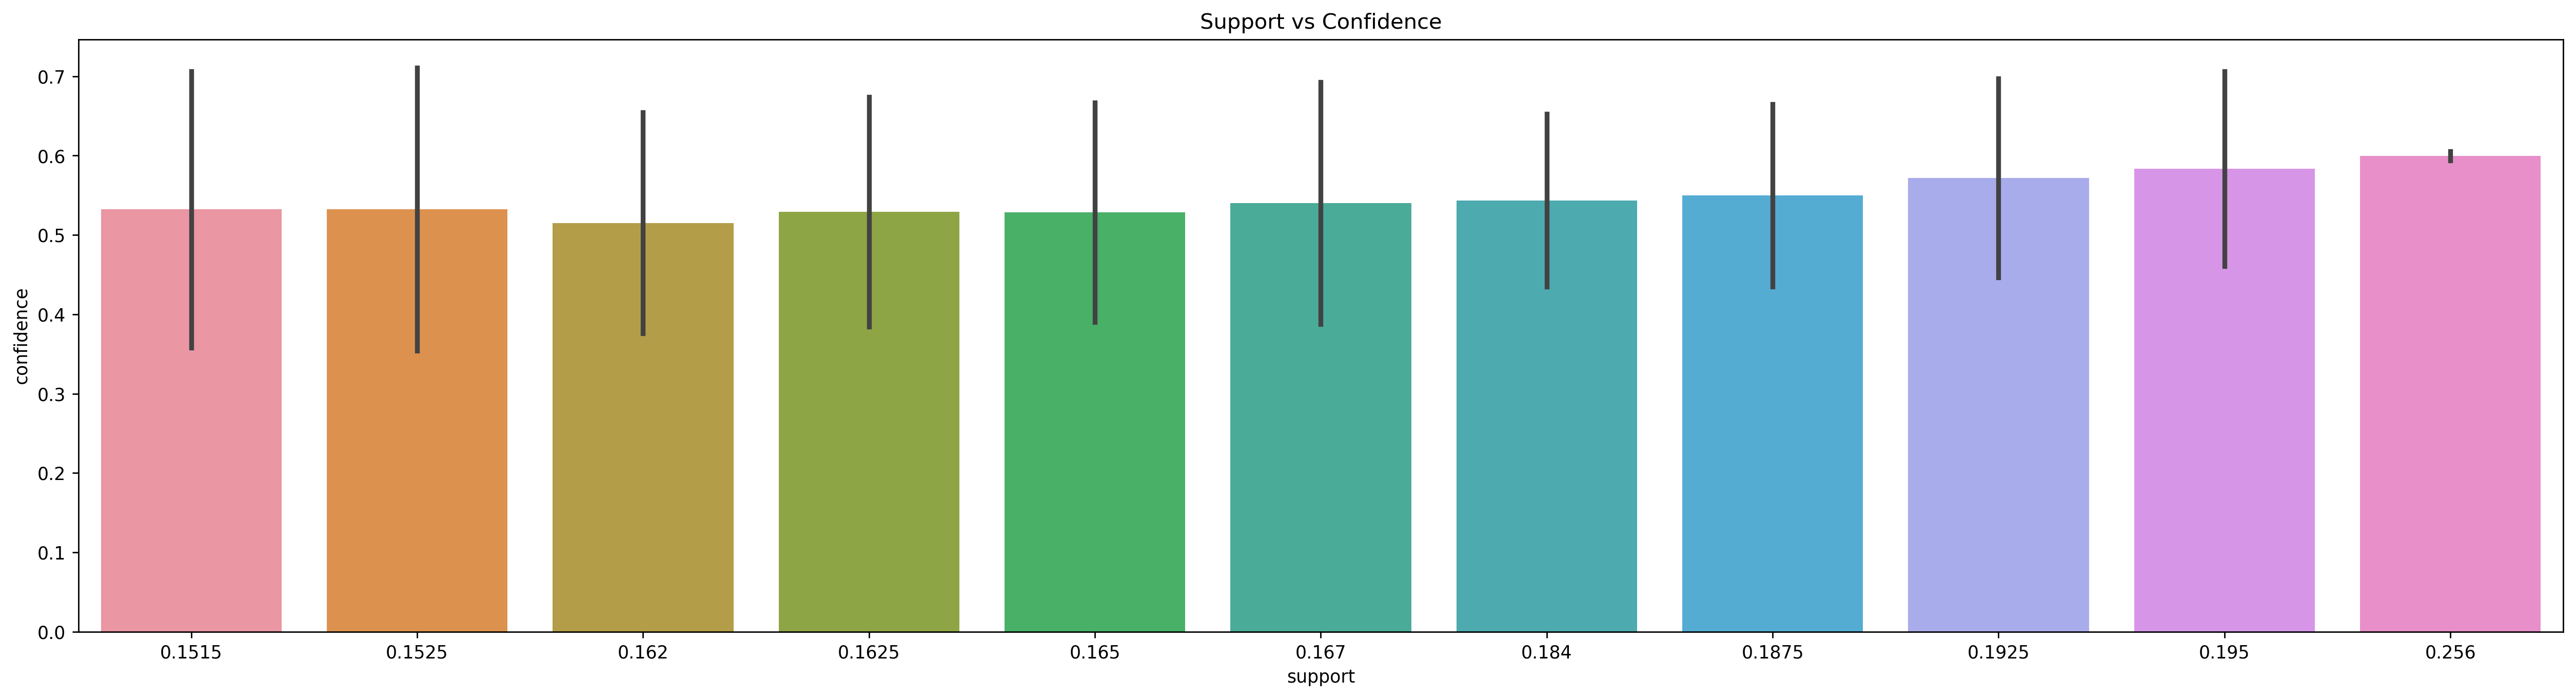

In [50]:

# Assuming 'rule1' DataFrame is already defined and contains the required data

# Set the figure size
plt.figure(figsize=(25, 6), dpi=250)

# Create a bar plot using seaborn
sns.barplot(x="support", y="confidence", data=rule1)

# Set plot title
plt.title("Support vs Confidence")

# Display the plot
plt.show()


**Min Support = 10%, Confidence = 60%**

In [53]:
#with support atleast 0.1 and confidence >= 60%
frequent_itemsets2 = apriori(book_df, min_support = 0.1, use_colnames=True)
frequent_itemsets2.shape

(39, 2)

In [54]:
rule2 = association_rules(frequent_itemsets2, metric = "lift", min_threshold = .60)
rule2.shape


(100, 10)

Even after decreasing confidence the number of rules remain same.

**Visualisation of rule with min Support = 10% Confidence = 60%**

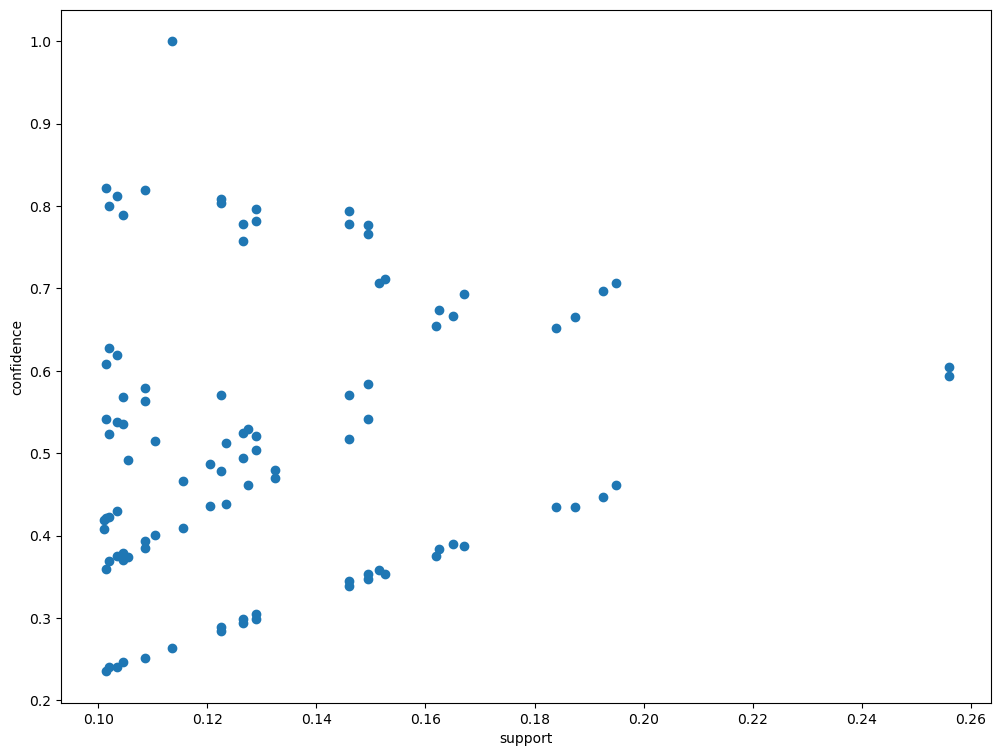

In [55]:
# visualization of obtained rule
plt.figure(figsize=(12,9))
plt.scatter(rule2['support'],rule2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

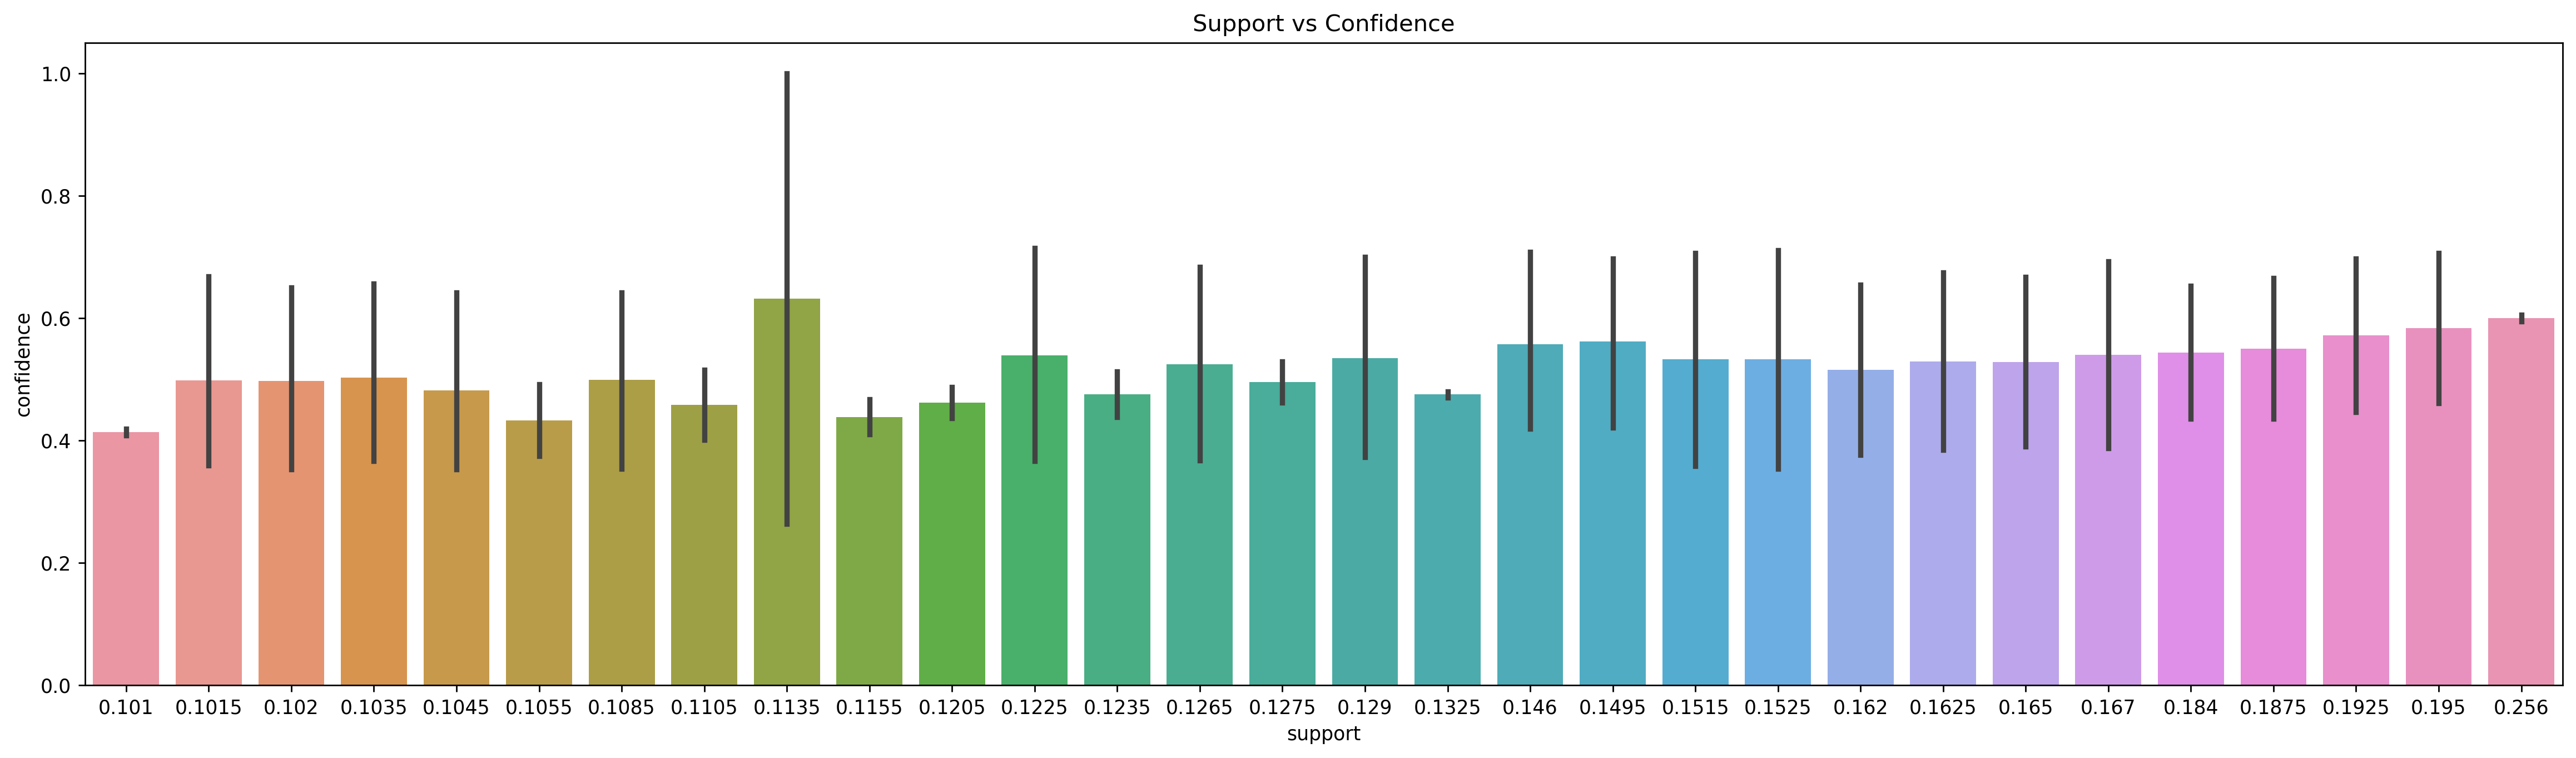

In [57]:

# Assuming 'rule2' DataFrame is already defined and contains the required data

# Set the figure size
plt.figure(figsize=(23, 6), dpi=250)

# Create a bar plot using seaborn
sns.barplot(x="support", y="confidence", data=rule2)

# Set plot title
plt.title("Support vs Confidence")

# Display the plot
plt.show()


**Min Support = 10% Confidence = 80%**

In [59]:
frequent_itemsets3 = apriori(book_df, min_support = 0.1, use_colnames=True)
frequent_itemsets3.shape

(39, 2)

In [60]:
rule3 = association_rules(frequent_itemsets3, metric = "lift", min_threshold = .80)
rule3.shape

(100, 10)

In this dataset there is no change in number of rules by confidence.

**Visualisation of Rule with Min support = 10% Confidence = 80%**

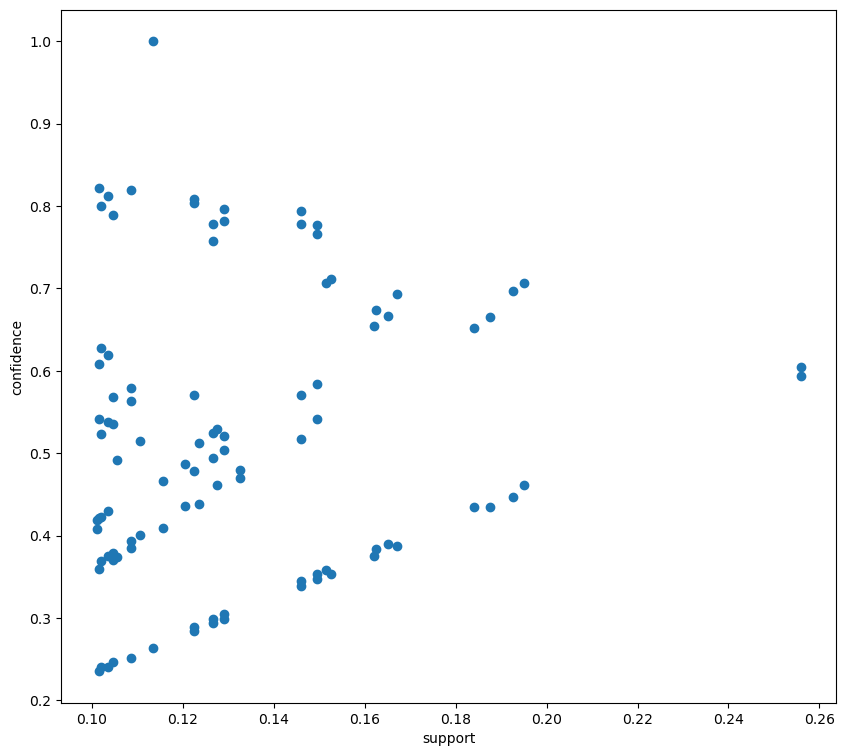

In [61]:
#obtained rule
plt.figure(figsize=(10,9))
plt.scatter(rule3['support'],rule3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

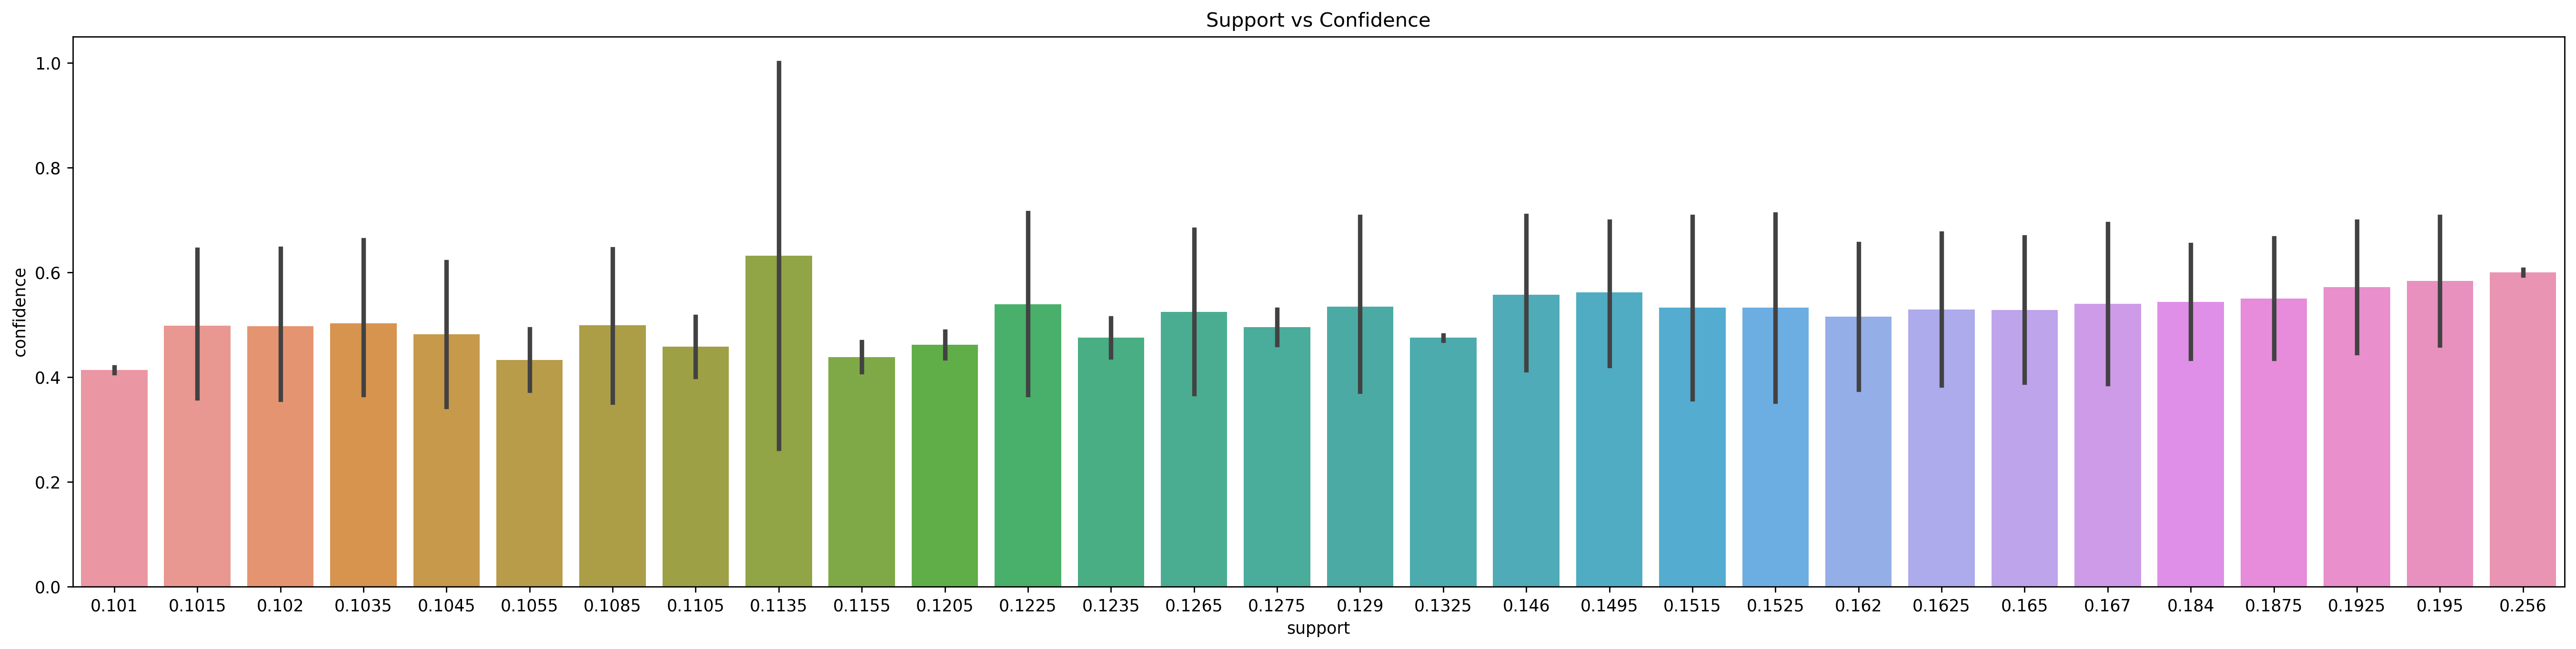

In [63]:

# Assuming 'rule3' DataFrame is already defined and contains the required data

# Set the figure size
plt.figure(figsize=(27, 6), dpi=250)

# Create a bar plot using seaborn
sns.barplot(x="support", y="confidence", data=rule3)

# Set plot title
plt.title("Support vs Confidence")

# Display the plot
plt.show()


**Min Support = 0.07 Confidence = 80%**

In [65]:
frequent_itemsets4 = apriori(book_df, min_support = 0.07, use_colnames=True)
frequent_itemsets4

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
61,0.0745,"(ChildBks, DoItYBks, CookBks, RefBks)"
62,0.0820,"(ChildBks, ArtBks, DoItYBks, CookBks)"
63,0.0890,"(ChildBks, DoItYBks, CookBks, GeogBks)"
64,0.0785,"(ChildBks, CookBks, GeogBks, RefBks)"


In [66]:
rule4 = association_rules(frequent_itemsets4, metric = "lift", min_threshold = .80)
rule4.shape

(306, 10)

**Visualisation of rule with min Support = 7%, Confidence = 80%**

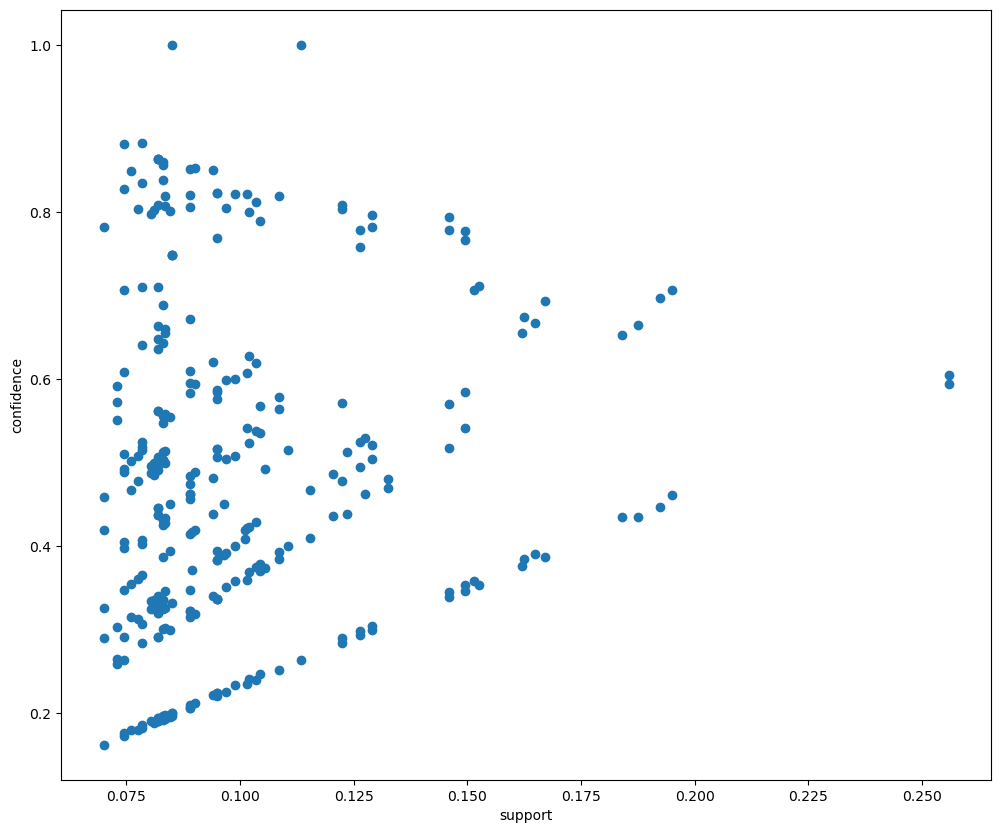

In [67]:
#  obtained rule
plt.figure(figsize=(12,10))
plt.scatter(rule4['support'],rule4['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [68]:
plt.figure(figsize=(32,9),dpi=250)
sns.barplot("support","confidence",data=rule4)
plt.title("support vs confidence")
plt.show()

TypeError: barplot() got multiple values for argument 'data'

<Figure size 8000x2250 with 0 Axes>

**Min Support = 7%, Confidence = 70%**

In [69]:
rule5 = association_rules(frequent_itemsets4, metric = "lift", min_threshold = .70)
rule5.shape

(306, 10)

**Visualisation of rule with Min Support = 7%, Confidence = 60%**

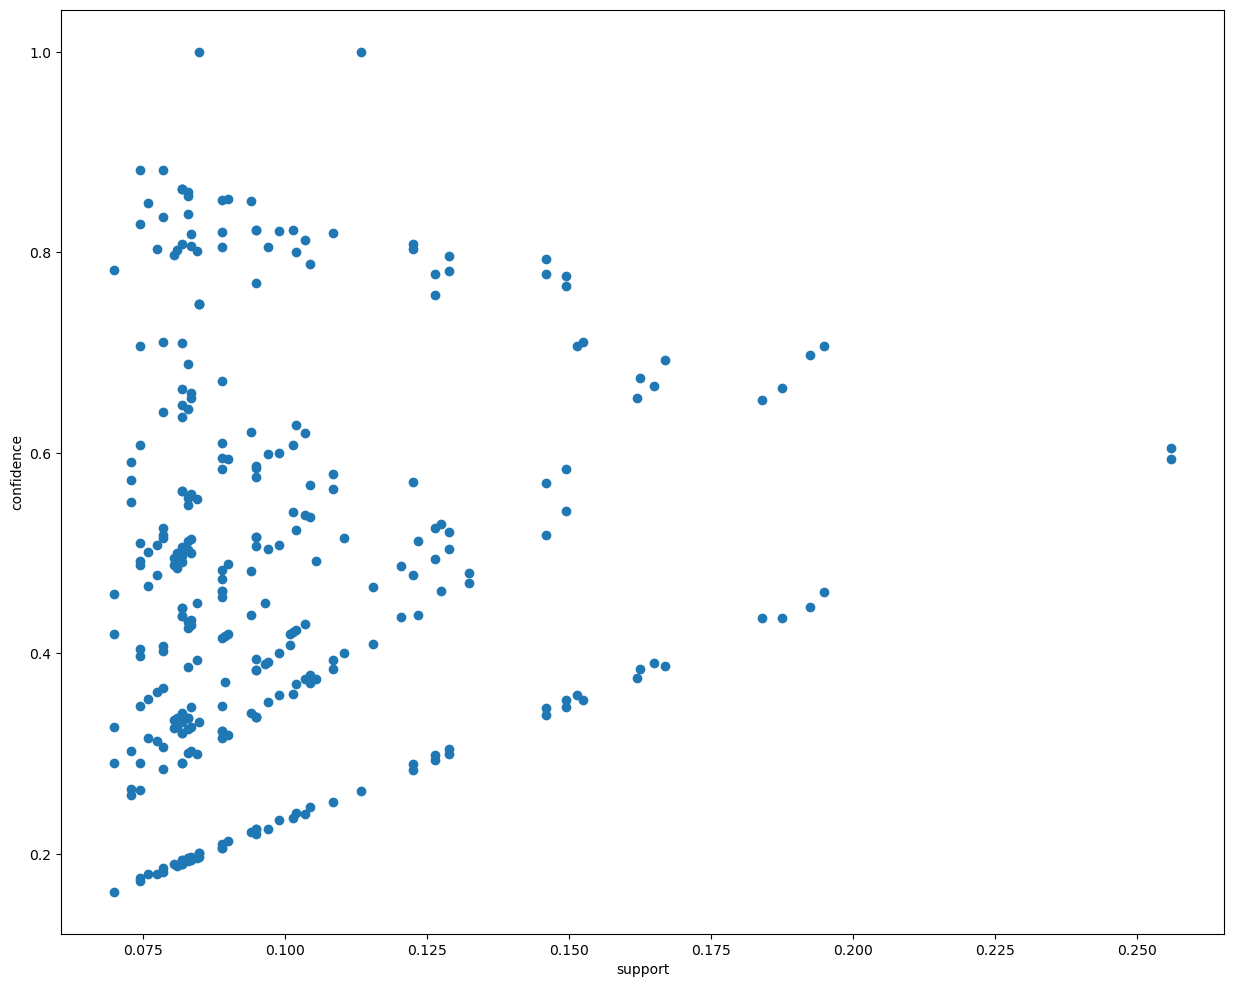

In [70]:
# visualization of obtained rule
plt.figure(figsize=(15,12))
plt.scatter(rule5['support'],rule5['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

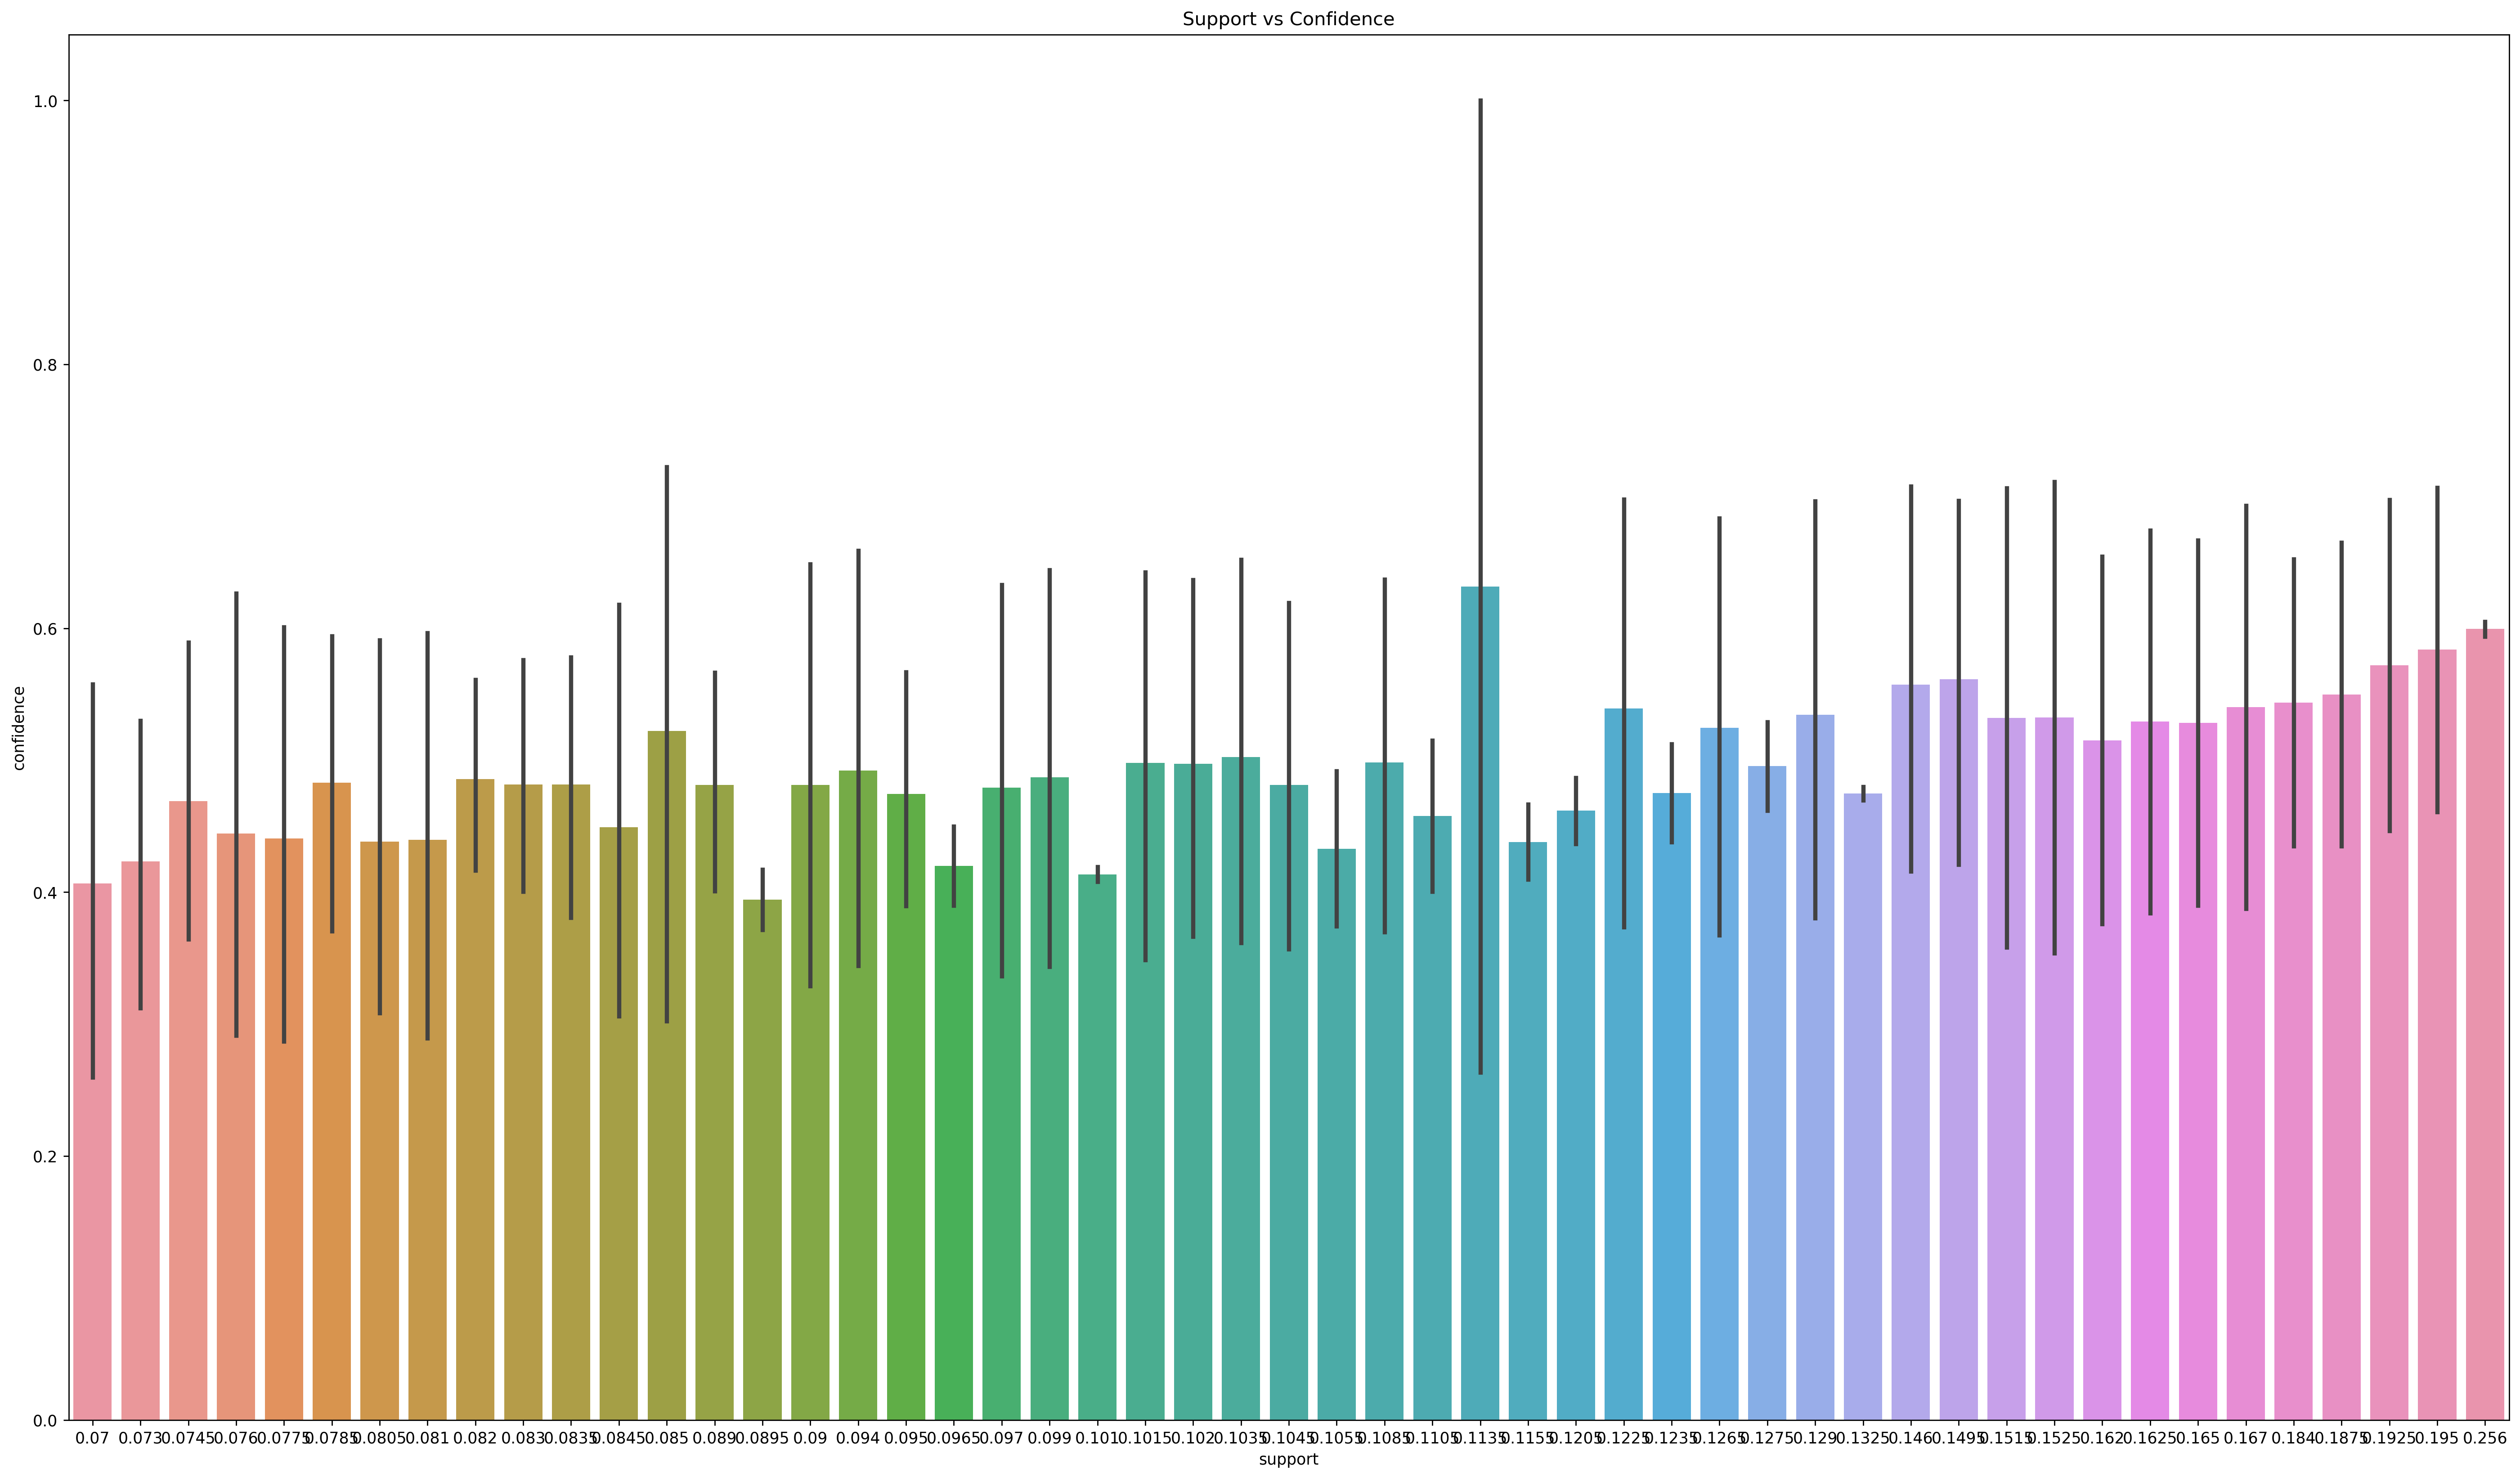

In [74]:
# Assuming 'rule5' DataFrame is already defined and contains the required data

# Set the figure size
plt.figure(figsize=(28, 16), dpi=250)

# Create a bar plot using seaborn
sns.barplot(x="support", y="confidence", data=rule5)

# Set plot title
plt.title("Support vs Confidence")

# Display the plot
plt.show()


**Min Support = 7%, Confidence = 60%**

In [75]:
rule6 = association_rules(frequent_itemsets4, metric = "lift", min_threshold = .60)
rule6.shape

(306, 10)

**Visualisation of rule with Min Support = 7%, Confidence = 60%**

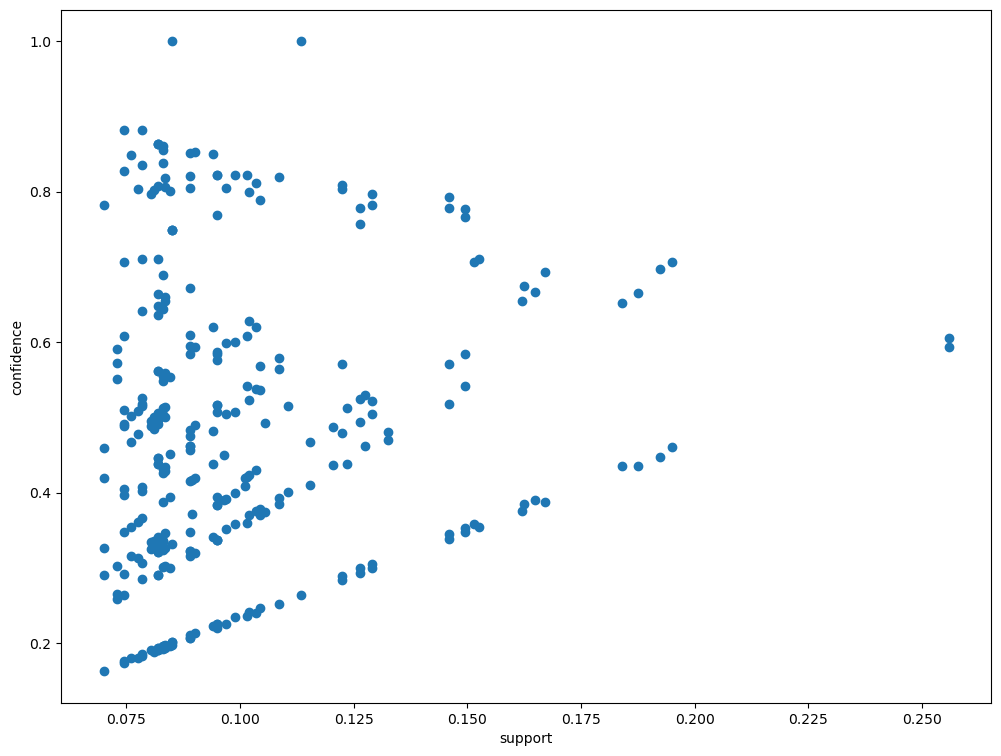

In [76]:
# visualization of obtained rule
plt.figure(figsize=(12,9))
plt.scatter(rule6['support'],rule6['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

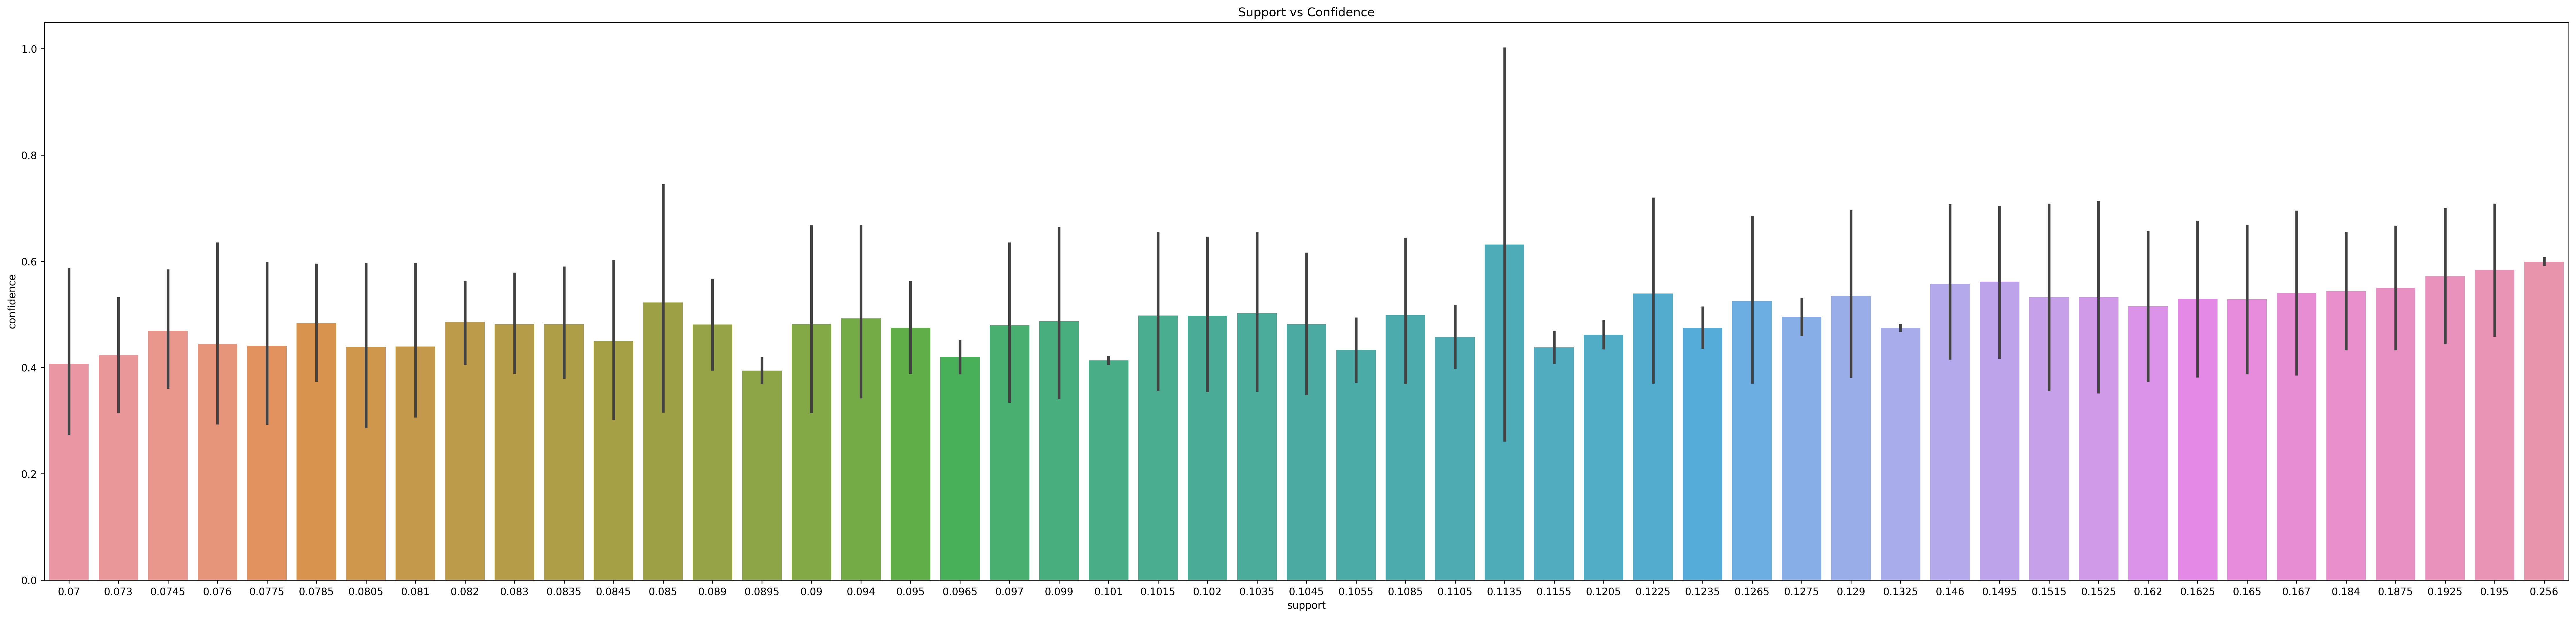

In [79]:
# Assuming 'rule6' DataFrame is already defined and contains the required data

# Set the figure size
plt.figure(figsize=(45, 10), dpi=250)

# Create a bar plot using seaborn
sns.barplot(x="support", y="confidence", data=rule6)

# Set plot title
plt.title("Support vs Confidence")

# Display the plot
plt.show()


In this dataset we can confirm if min support is reduced, number of rules are increased but if confidence chnages there is no difference in number of rules.

Also we can observe if we lower the min support then we get higher lengths of column clubbed together.